<a href="https://colab.research.google.com/github/Batorejro/Machine-Learning-boot/blob/main/zadanie17_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Feature importance

Tutaj zaczyna się zadanie 17.3

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)
clf.score(X, y)

0.81625

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer(min_df=0.01, max_df=0.5)
X_count = count.fit_transform(spam_dataset['Lemmatized_Text'].apply(lambda x: ' '.join(x)))
X_count

<5572x129 sparse matrix of type '<class 'numpy.int64'>'
	with 15648 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_v2 = RandomForestClassifier(max_depth=2, random_state=0)
clf_v2.fit(X, y)
clf_v2.score(X, y)

0.81625

Metoda vocabulary


In [ ]:
vocabulary_v2 = count.get_feature_names_out()
vocabulary_v2

array(['already', 'also', 'always', 'amp', 'anything', 'around', 'ask',
       'babe', 'back', 'buy', 'call', 'cant', 'care', 'cash', 'claim',
       'co', 'come', 'contact', 'could', 'customer', 'da', 'day', 'dear',
       'didnt', 'dont', 'even', 'every', 'feel', 'find', 'first', 'free',
       'friend', 'get', 'give', 'go', 'going', 'gon', 'good', 'got',
       'great', 'guy', 'happy', 'hey', 'hi', 'home', 'hope', 'ill', 'im',
       'ive', 'keep', 'know', 'last', 'later', 'let', 'life', 'like',
       'lol', 'lor', 'love', 'ltgt', 'make', 'meet', 'message', 'min',
       'miss', 'mobile', 'morning', 'msg', 'much', 'na', 'need', 'new',
       'next', 'nice', 'night', 'number', 'oh', 'ok', 'one', 'per',
       'phone', 'pick', 'place', 'please', 'pls', 'prize', 'really',
       'reply', 'right', 'said', 'say', 'see', 'send', 'sent', 'service',
       'show', 'something', 'soon', 'sorry', 'still', 'stop', 'sure',
       'take', 'tell', 'text', 'thanks', 'thats', 'thing', 'think',
    

In [ ]:
print(X_count.toarray()[:5])

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
  0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
  0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
count_v2 = CountVectorizer(max_df=0.1, max_features=500)
X_count_v2 = count_v2.fit_transform(spam_dataset['Lemmatized_Text'].apply(lambda x: ' '.join(x)))
lda = LatentDirichletAllocation(n_components=7, random_state=2022,
                                learning_method='batch')
X_topics = lda.fit_transform(X_count_v2)

In [ ]:
feature_names = count_v2.get_feature_names_out() # Use get_feature_names_out() for newer versions of scikit-learn
for topic_idx, topic in enumerate(lda.components_):
    print(f'Temat: {topic_idx+1}')
    print(' '.join([feature_names[i] for i in topic.argsort()[:-5-1:-1]]))
    print()

Temat: 1
call later sorry prize claim

Temat: 2
call free text stop reply

Temat: 3
ok lor na go ur

Temat: 4
im going home take da

Temat: 5
ltgt im time want come

Temat: 6
good love day happy hope

Temat: 7
dont get know back like



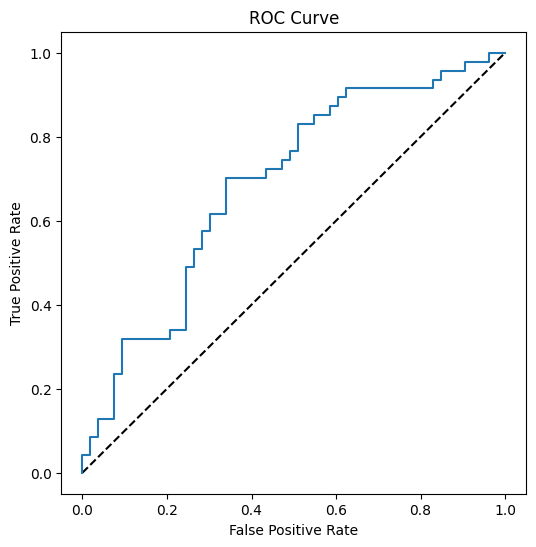

AUC: 0.6876756322761944


In [ ]:
from sklearn.linear_model import LogisticRegression # import the LogisticRegression model
from sklearn.preprocessing import StandardScaler # import the StandardScaler module

# Assuming X_train and y_train are defined and available in the environment
scaler = StandardScaler() # Initialize the StandardScaler
X_train_standardized = scaler.fit_transform(X_train) # Standardize the training data

model_lr = LogisticRegression() # Initialize the model
model_lr.fit(X_train_standardized, y_train) # Train the model

X_test_standardized = scaler.transform(X_train) # Standardize the test data
# prognoza prawdopodobieństwa
predictions_probability_lr = model_lr.predict_proba(X_test_standardized)

# obliczenie FPR oraz TPR w zależności od punktu odcięcia
fpr, tpr, thresholds = roc_curve(y_train, predictions_probability_lr[:,1])

# wizualizacja ROC Curve
fig = plt.figure(figsize=(6, 6))

# rysowanie prostej dla modelu losowego
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# obliczenie AUC
auc = roc_auc_score(y_train, predictions_probability_lr[:,1])
print('AUC: ' + str(auc))

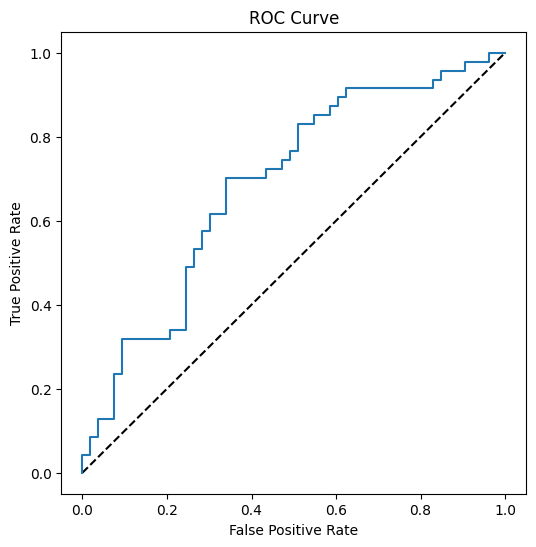

AUC: 0.6876756322761944
              precision    recall  f1-score   support

           0       0.66      0.70      0.68        53
           1       0.64      0.60      0.62        47

    accuracy                           0.65       100
   macro avg       0.65      0.65      0.65       100
weighted avg       0.65      0.65      0.65       100



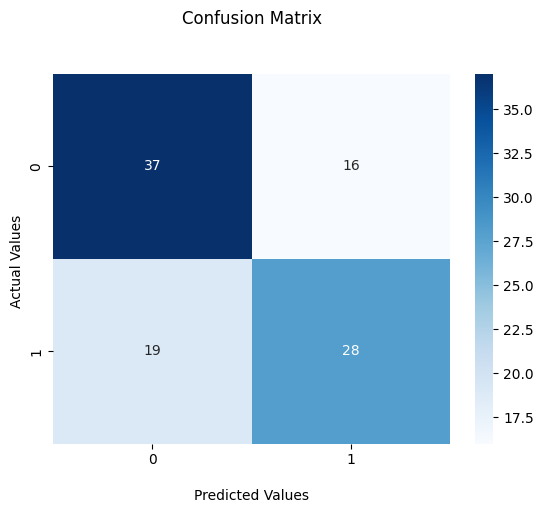

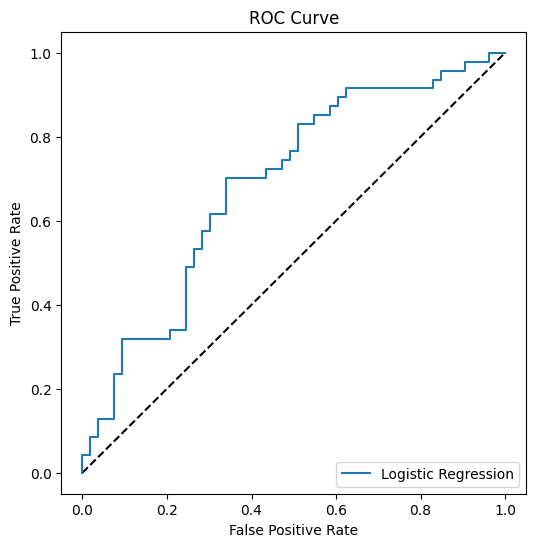

<ipython-input-80-2f3ba07adac4>:78: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_dataframe = pd.concat([metrics_dataframe, pd.DataFrame({'Model': [name], 'F1_score': [f1_metric], 'AUC': [auc_metric]})], ignore_index=True)


,Model,F1_score,AUC
0,Logistic Regression,0.615385,0.687676


In [ ]:
from sklearn.linear_model import LogisticRegression # import the LogisticRegression model
from sklearn.preprocessing import StandardScaler # import the StandardScaler module
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, f1_score # import metrics functions
import matplotlib.pyplot as plt # import the matplotlib library
import seaborn as sns # import the seaborn library
import pandas as pd # import the pandas library


# Assuming X_train and y_train are defined and available in the environment
scaler = StandardScaler() # Initialize the StandardScaler
X_train_standardized = scaler.fit_transform(X_train) # Standardize the training data

model_lr = LogisticRegression() # Initialize the model
model_lr.fit(X_train_standardized, y_train) # Train the model

X_test_standardized = scaler.transform(X_train) # Standardize the test data
# prognoza prawdopodobieństwa
predictions_probability_lr = model_lr.predict_proba(X_test_standardized)

# obliczenie FPR oraz TPR w zależności od punktu odcięcia
fpr, tpr, thresholds = roc_curve(y_train, predictions_probability_lr[:,1])

# wizualizacja ROC Curve
fig = plt.figure(figsize=(6, 6))

# rysowanie prostej dla modelu losowego
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# obliczenie AUC
auc = roc_auc_score(y_train, predictions_probability_lr[:,1])
print('AUC: ' + str(auc))

metrics_dataframe = pd.DataFrame(columns = ['Model', 'F1_score', 'AUC'])
metrics_dataframe
models = []
models_names = []
predictions_proba_list = []
def calculate_metrics(model, name, X_checked, y_checked):
    models.append(model)
    models_names.append(name)
    global metrics_dataframe
    predictions = model.predict(X_checked)
    predictions_proba = model.predict_proba(X_checked)
    predictions_proba_list.append(predictions_proba[:,1])

    #metryki dla sprawdzanego modelu
    print(classification_report(y_checked, predictions))

    # Confusion matrix
    plt.figure()
    cm = confusion_matrix(y_checked, predictions)
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
    ax.set_title('Confusion Matrix\n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    plt.show()

    # plot ROC curve
    fig = plt.figure(figsize=(6, 6))
    plt.plot([0, 1], [0, 1], 'k--')
    for model_selected, name_selected, pred_proba in zip(models, models_names, predictions_proba_list):
        fpr, tpr, thresholds = roc_curve(y_checked, pred_proba)
        plt.plot(fpr, tpr, label=name_selected)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()


    f1_metric = f1_score(y_checked, predictions)
    auc_metric = roc_auc_score(y_checked, predictions_proba[:,1])
    metrics_dataframe = pd.concat([metrics_dataframe, pd.DataFrame({'Model': [name], 'F1_score': [f1_metric], 'AUC': [auc_metric]})], ignore_index=True)
    return metrics_dataframe

#calculate_metrics(model_lr, 'Logistic Regression', X_test_standardized, y_train)
"""
    f1_metric = f1_score(y_checked, predictions)
    auc_metric = roc_auc_score(y_checked, predictions_proba[:,1])
    metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC': auc_metric},
                                                 ignore_index=True)
    return metrics_dataframe
"""
calculate_metrics(model_lr, 'Logistic Regression', X_test_standardized, y_train)
